1. Import Data and Libraries


In [150]:
!pip install pandas
!pip install numpy
!pip install matplotlib
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
import pandas as pd
import numpy as np

ta=pd.read_csv("/content/drive/My Drive/task_data.csv")
ta.drop('sample index',axis=1,inplace=True)
ta

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969
...,...,...,...,...,...,...,...,...,...,...,...
395,-1.0,0.433150,0.816109,0.452945,0.065469,0.237093,0.719321,0.577969,0.085598,0.357115,0.070060
396,-1.0,0.339346,0.914610,0.097827,0.077522,0.484140,0.690568,0.420054,0.482845,0.395148,0.438641
397,-1.0,0.320118,0.444951,0.401896,0.970993,0.960264,0.138345,0.354927,0.230749,0.204612,0.558889
398,-1.0,0.059132,0.337426,0.772847,0.099038,0.966042,0.975086,0.532891,0.035839,0.258723,0.709958


2. Explanatory Data Analysis

2.A. Correlation Matrix

In [3]:
ta.corr()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
class_label,1.000000,0.543295,-0.252007,0.038775,0.433636,0.607623,0.224147,-0.007414,0.175612,0.660618,0.094907
sensor0,0.543295,1.000000,-0.215668,0.019521,0.253244,0.300760,0.164243,-0.007849,0.080306,0.361751,0.001317
sensor1,-0.252007,-0.215668,1.000000,0.056042,-0.111347,-0.130463,0.055401,-0.106082,0.031513,-0.163818,-0.023655
sensor2,0.038775,0.019521,0.056042,1.000000,0.093447,-0.023486,-0.008948,-0.057090,0.006899,-0.008308,-0.058528
sensor3,0.433636,0.253244,-0.111347,0.093447,1.000000,0.295136,0.038152,-0.105005,0.001243,0.287776,0.013732
sensor4,0.607623,0.300760,-0.130463,-0.023486,0.295136,1.000000,0.183916,-0.022690,0.090186,0.378306,0.023776
sensor5,0.224147,0.164243,0.055401,-0.008948,0.038152,0.183916,1.000000,-0.061238,0.020814,0.220014,0.071258
sensor6,-0.007414,-0.007849,-0.106082,-0.057090,-0.105005,-0.022690,-0.061238,1.000000,0.065211,-0.073309,0.040744
sensor7,0.175612,0.080306,0.031513,0.006899,0.001243,0.090186,0.020814,0.065211,1.000000,0.060028,0.059341
sensor8,0.660618,0.361751,-0.163818,-0.008308,0.287776,0.378306,0.220014,-0.073309,0.060028,1.000000,-0.033991


2.B. Summary Statistics

In [4]:
ta.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


2.C. Plotting of Each Sensor Against Target Variable

**Comment: Sensor6's correlation with class_label is low. However, based on plots, it seems that low and high value of sensor6  is associated with class_label 1 and middle values of sensor6 are associated with class_label -1.**

sensor0 versus class_label


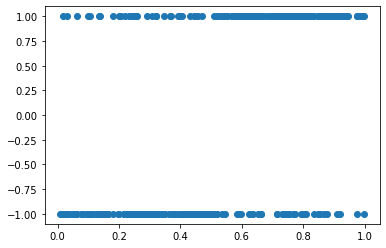

sensor1 versus class_label


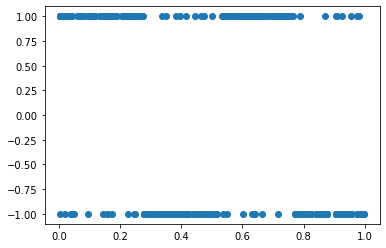

sensor2 versus class_label


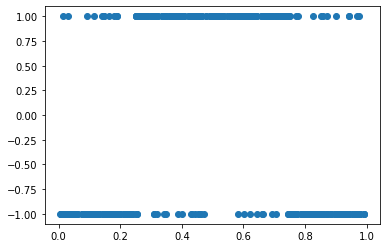

sensor3 versus class_label


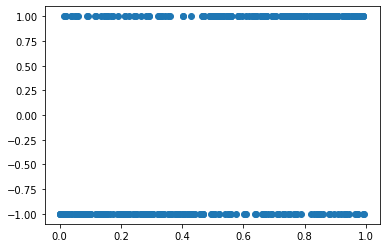

sensor4 versus class_label


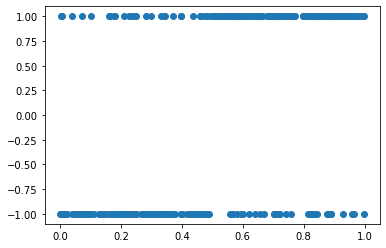

sensor5 versus class_label


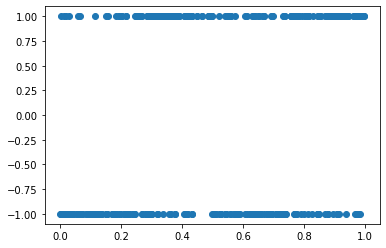

sensor6 versus class_label


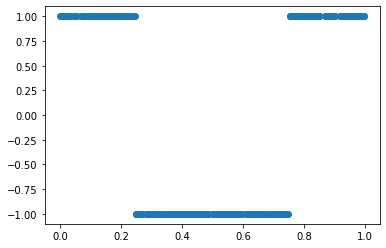

sensor7 versus class_label


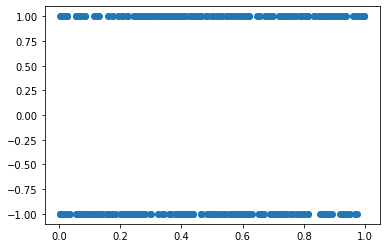

sensor8 versus class_label


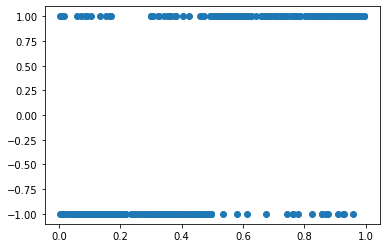

sensor9 versus class_label


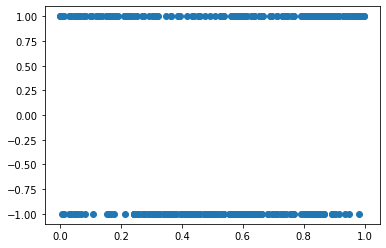

In [5]:

for k in range (0,10):
  s='sensor'+str(k)
  plt='pl'+str(k)
  print(s+ ' versus class_label')
  import matplotlib.pyplot as plt
  plt.scatter(ta[s],ta['class_label'] )
  plt.show()



2.D. The Distrubition of Input Variables

sensor0


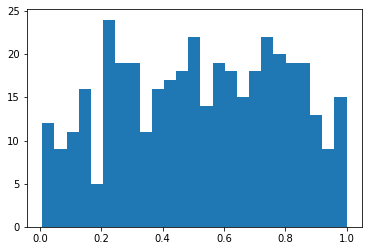

sensor1


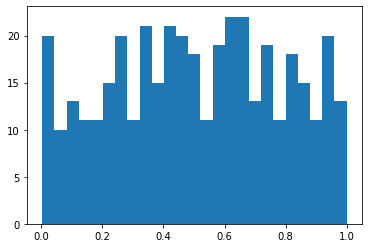

sensor2


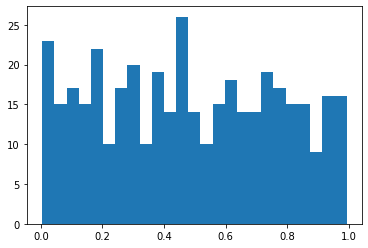

sensor3


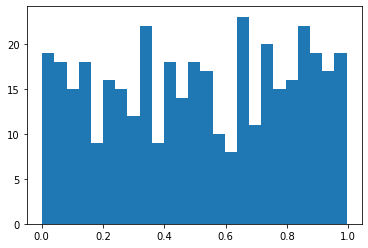

sensor4


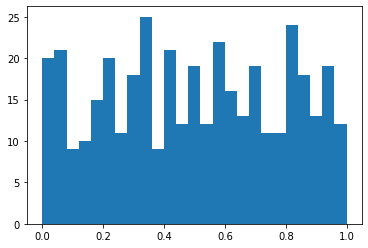

sensor5


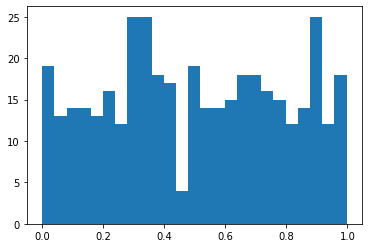

sensor6


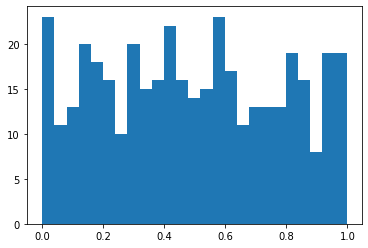

sensor7


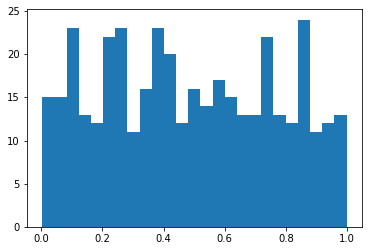

sensor8


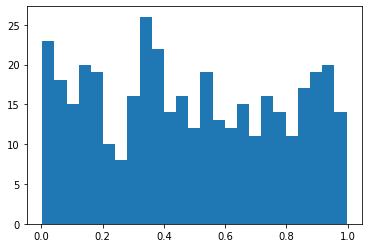

sensor9


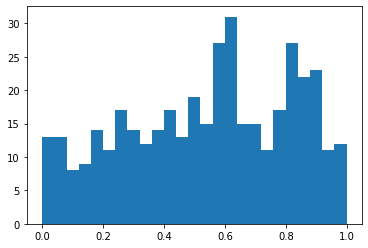

In [6]:
for k in range (0,10):
  s='sensor'+str(k)
  plt='pl'+str(k)
  print(s)
  import matplotlib.pyplot as plt
  plt.hist(ta[s], bins = 25)
  plt.show()

3. Analysis: XGBoost

In [140]:
td=ta.copy()
#We change target variablealue -1 to 0.
td['class_label']=np.where(td['class_label']==-1,0,td['class_label'])
#Assign target variable to Y and drop it from the list of input variables.

Y=td['class_label']
td.drop([ 'class_label'], axis = 1, inplace = True)
td

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969
...,...,...,...,...,...,...,...,...,...,...
395,0.433150,0.816109,0.452945,0.065469,0.237093,0.719321,0.577969,0.085598,0.357115,0.070060
396,0.339346,0.914610,0.097827,0.077522,0.484140,0.690568,0.420054,0.482845,0.395148,0.438641
397,0.320118,0.444951,0.401896,0.970993,0.960264,0.138345,0.354927,0.230749,0.204612,0.558889
398,0.059132,0.337426,0.772847,0.099038,0.966042,0.975086,0.532891,0.035839,0.258723,0.709958


In [141]:
#https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(td, Y)
y_pred=model.predict(td)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, Y))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, Y))

1.0
[[200   0]
 [  0 200]]


Text(0.5, 0, 'Permutation Importance')

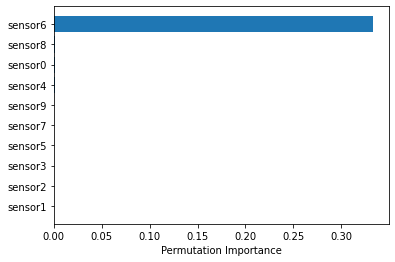

In [142]:
#Code in this cell  is taken from https://mljar.com/blog/feature-importance-in-random-forest/
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, td, Y)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(td.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [143]:
td.drop(['sensor0','sensor1','sensor2','sensor3','sensor4','sensor5','sensor7','sensor8','sensor9'],axis=1,inplace=True)
td

,sensor6
0,0.111308
1,0.833575
2,0.075905
3,0.827723
4,0.183760
...,...
395,0.577969
396,0.420054
397,0.354927
398,0.532891


In [144]:

#https://stackoverflow.com/questions/51323595/plot-a-single-xgboost-decision-tree
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(td, Y)
y_pred2=model.predict(td)
from sklearn.metrics import accuracy_score
accuracy2=accuracy_score(y_pred2, Y)
print(accuracy2)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, Y))

1.0
[[200   0]
 [  0 200]]


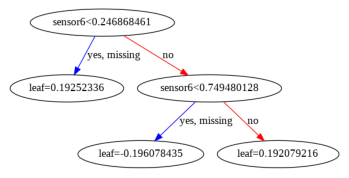

In [148]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plot_tree(model)
plt.show()

XGBoost perfectly discriminate both classes from each other. For confirmation and better understood decision tree, we also visualize it based on Random Forest 

4. Random Forest Decision Tree Visualization

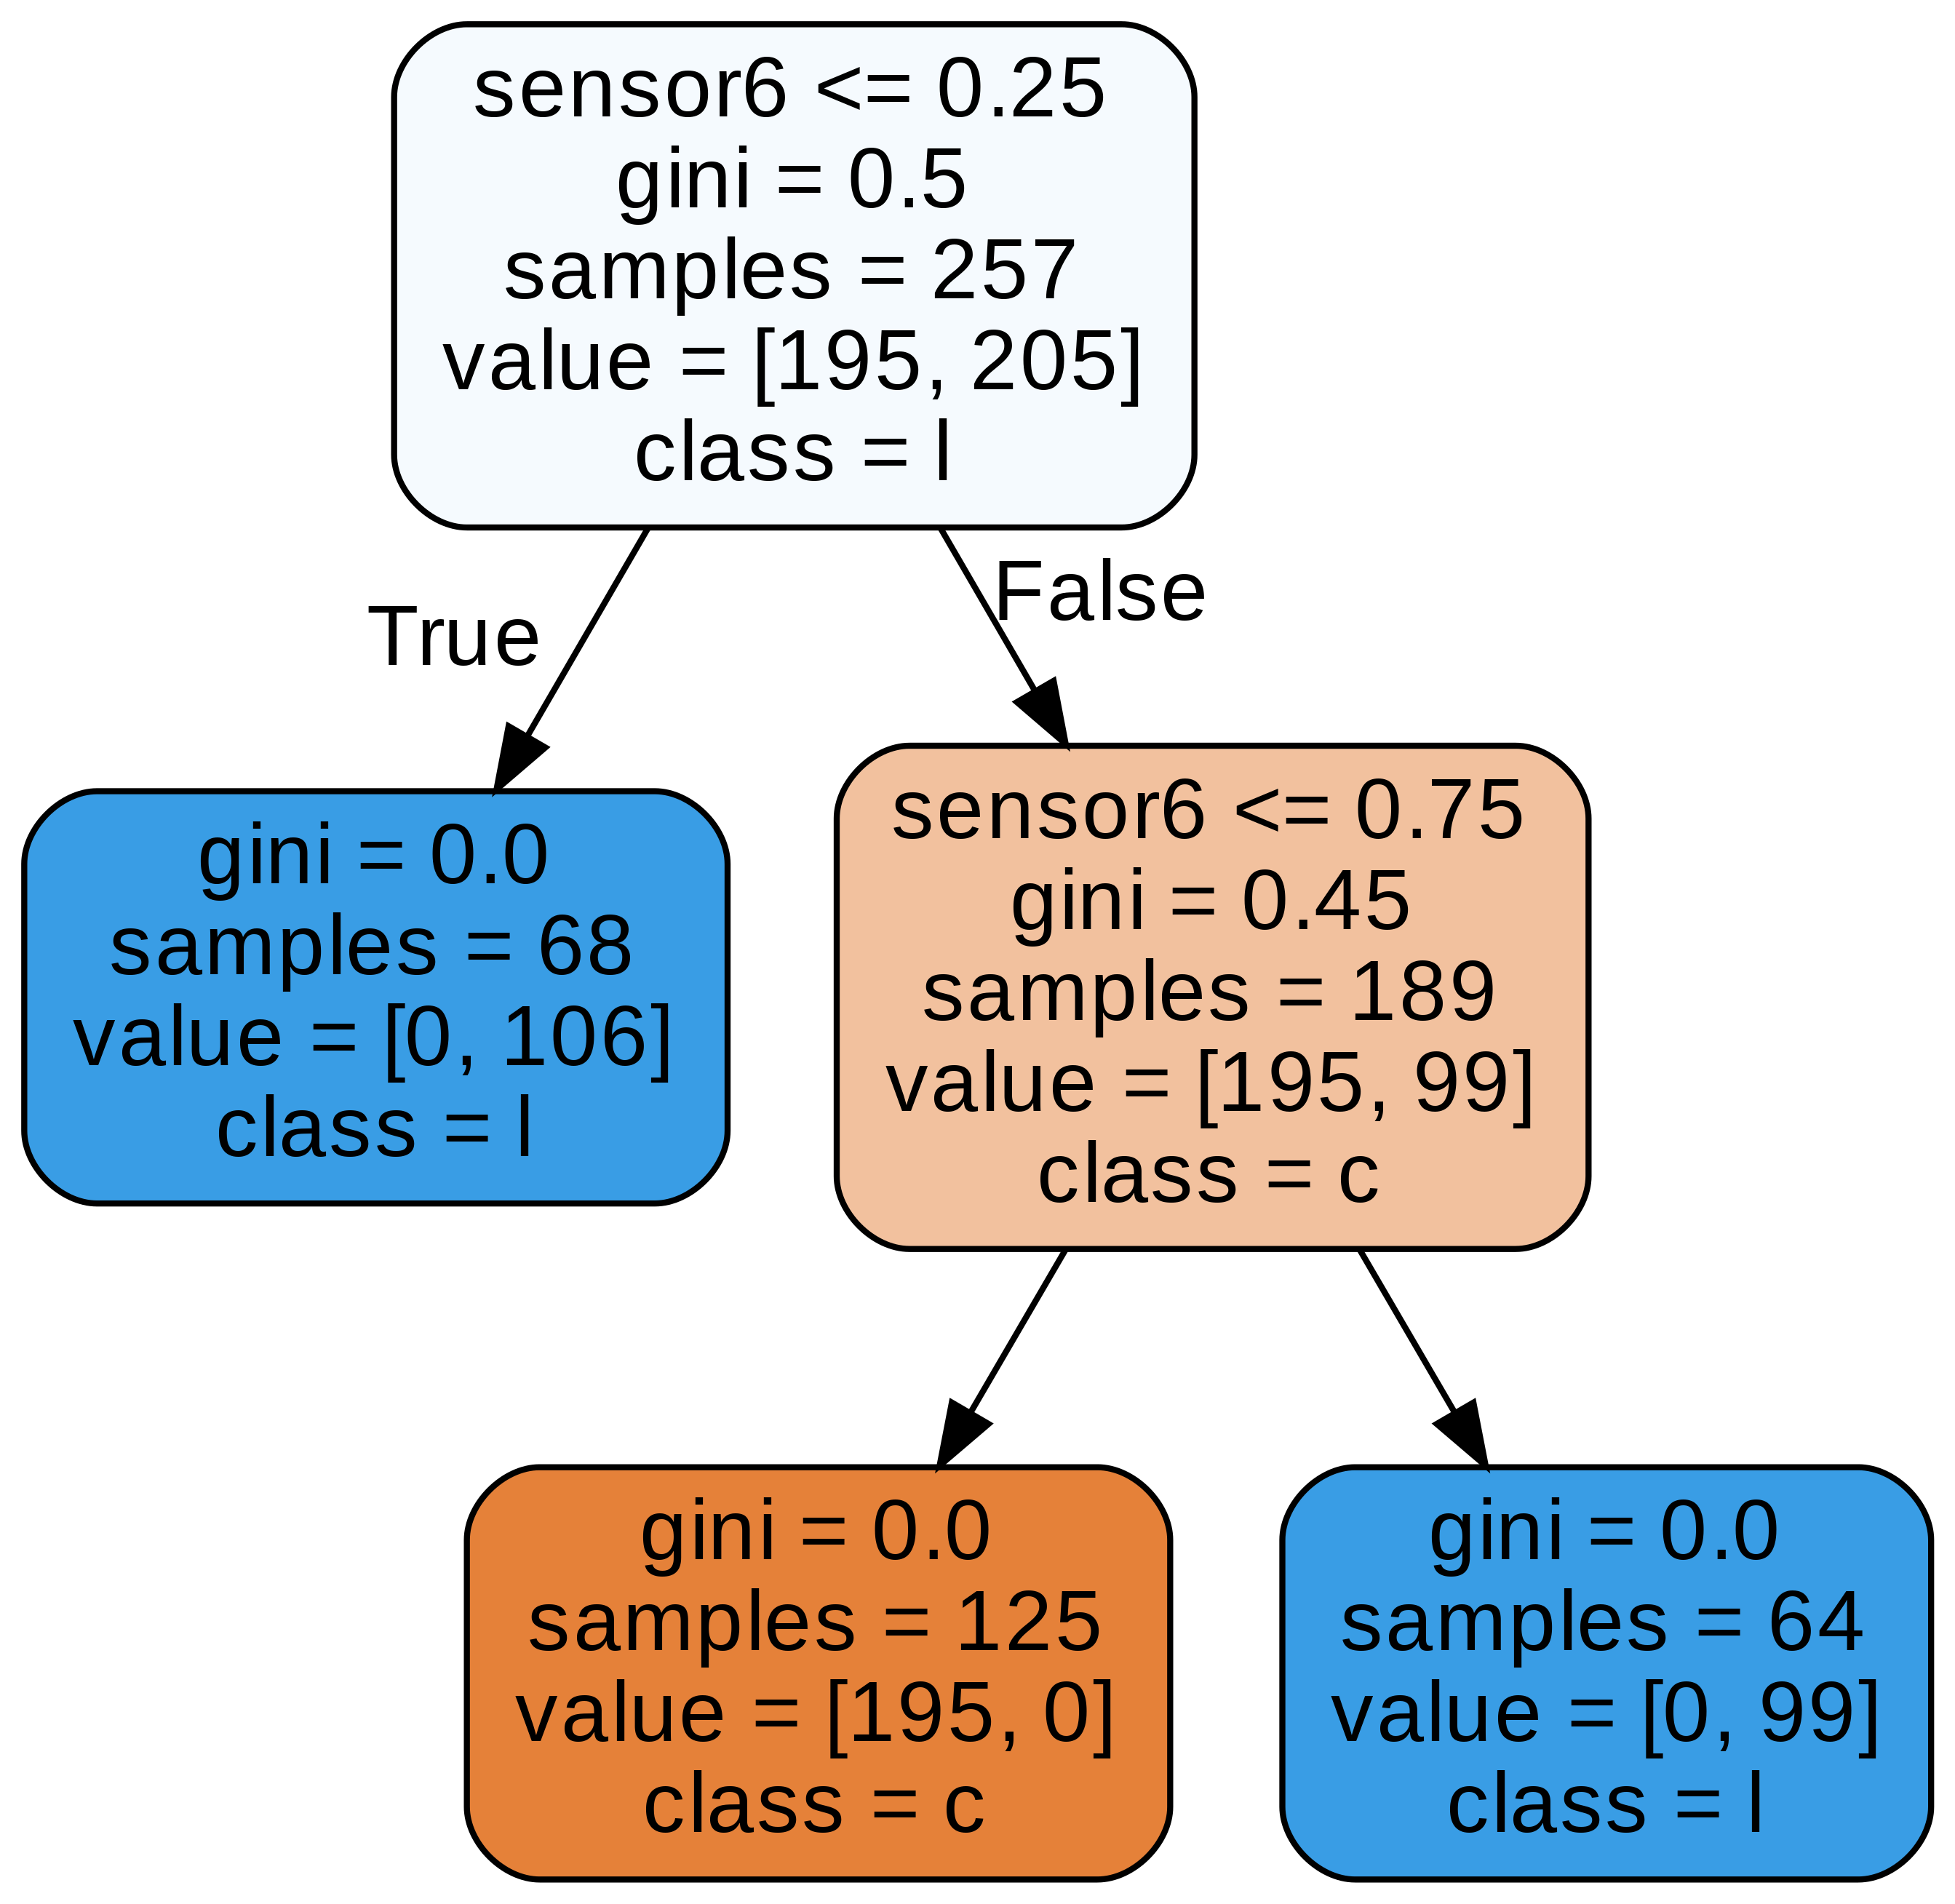

In [139]:
#Code is taken mainly from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(td, Y)
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = 'class_label',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
